In [406]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from time import sleep
from bs4 import BeautifulSoup

In [407]:
chromedriver = "C:\Python\Python38\Scripts\chromedriver.exe"

In [408]:
review_dict = {'id_review':[], 'user':[], 'review':[], 'ratings':[], 'pub_date':[]}

In [409]:
#Great Wall of China: ChIJzyx_aNch8TUR3yIFlZslQNA Huairou District, China
place_id = input("Enter the place ID:")
driver = webdriver.Chrome(chromedriver)
url = "https://www.google.it/maps/place/Great+Wall+of+China/@40.4319077,116.5703749,17z/data=!4m7!3m6!1s0x35f121d7687f2ccf:0xd040259b950522df!8m2!3d40.4319077!4d116.5703749!9m1!1b1"
driver.get(url)
wait = WebDriverWait(driver, 10)
sleep(5)

for i in range(15):
    scrollable_div = driver.find_element_by_css_selector( 'div.section-layout.section-scrollbox.scrollable-y.scrollable-show')
    driver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', scrollable_div)
    wait = WebDriverWait(driver, 10)
    sleep(5)

response = BeautifulSoup(driver.page_source, 'html.parser')
rlist = response.find_all('div', class_='section-review-content')

for reviews in rlist:
    
    id_r = reviews.find('button', class_='section-review-action-menu')['data-review-id']
    review_dict['id_review'].append(id_r)

    username = reviews.find('div', class_='section-review-title').find('span').text
    review_dict['user'].append(username)

    try:
        reviews.find('span', class_='section-review-text').text
        review_dict['review'].append(reviews.find('span', class_='section-review-text').text)
            
    except Exception:
        review_text = None
        review_dict['review'].append(review_text)
        
    rating = reviews.find('span', class_='section-review-stars')['aria-label']
    review_dict['ratings'].append(rating)
    
    rel_date = reviews.find('span', class_='section-review-publish-date').text
    review_dict['pub_date'].append(rel_date)


driver.switch_to.window(driver.window_handles[-1])
driver.close()
driver.switch_to.window(driver.window_handles[0])
driver.close()
review_dict['review']

Enter the place ID:ChIJzyx_aNch8TUR3yIFlZslQNA Huairou District, China


["There is so much beauty and history in this place. It is a lot warmer on the wall then the area where you buy tickets so don't be worried if you think it's too cold to have fun! Overall if you go to China you need to come here it was such an amazing experience!",
 'The Great Wall of China is the collective name of a series of fortification systems generally built across the historical northern borders of China to protect and consolidate territories of Chinese states and empires against various nomadic …',
 'There is so much beauty and history in this place. I had an incredible time here and I went during November so there was not many people. It is a lot warmer on the wall then the area where you buy tickets so don’t be worried if you think …',
 'I wanted to visit the Great Wall of China ever since kindergarten when I saw a program about it on TV.  Not only did I see the wall, but I ran a marathon on it when I was 36 years old.  That sensation of awe and satisfaction is hard to beat.

In [357]:
import pandas as pd
df = pd.DataFrame.from_dict(review_dict, orient='index').transpose()

In [358]:
df

,id_review,user,review,ratings,pub_date
0,ChZDSUhNMG9nS0VJQ0FnSURzenU3Mk13EAEaFk1UeTVyem...,Hossain,There is so much beauty and history in this pl...,5 stars,2 months ago
1,ChdDSUhNMG9nS0VJQ0FnSUNjLWN2Q2tBRRABGhZEd1lZdV...,akar muhammad,The Great Wall of China is the collective name...,5 stars,a month ago
2,ChZDSUhNMG9nS0VJQ0FnSURzc3BpaGF3EAEaFnlyTDAtM2...,Moina Abubaker,There is so much beauty and history in this pl...,5 stars,2 months ago
3,ChZDSUhNMG9nS0VJQ0FnSUNzNk95SEJBEAEaFjhhQTFULU...,A C,I wanted to visit the Great Wall of China ever...,5 stars,3 months ago
4,ChdDSUhNMG9nS0VJQ0FnSUNjOEoyeGhBRRABGhZCSndsdF...,Jordan Simons,"Truly, one of the greatest accomplishments of ...",5 stars,a month ago
...,...,...,...,...,...
153,ChZDSUhNMG9nS0VJQ0FnSUQwdUt5Ukl3EAEaFnBpbV9nU2...,Luis Jordan Cerra,I used it for a school project. :) .... Anywa...,5 stars,6 months ago
154,ChdDSUhNMG9nS0VJQ0FnSURNNU9YTl9RRRABGhZUZUxxSU...,Promi Chakma,Well Great wall was a dream to visit there so ...,5 stars,4 months ago
155,ChZDSUhNMG9nS0VJQ0FnSUNzdzZpVll3EAEaFktLaXNyYl...,sjy liem,amazing one of the wonder wotld,5 stars,2 months ago
156,ChZDSUhNMG9nS0VJQ0FnSURNcDlDLVNBEAEaFlpaemc1bT...,Ramsharan Sahu,Mind blowing awesome place,5 stars,3 months ago


In [359]:
df.to_csv('google_user_reviews.csv')

In [360]:
df.drop(['id_review'], axis = 1)

,user,review,ratings,pub_date
0,Hossain,There is so much beauty and history in this pl...,5 stars,2 months ago
1,akar muhammad,The Great Wall of China is the collective name...,5 stars,a month ago
2,Moina Abubaker,There is so much beauty and history in this pl...,5 stars,2 months ago
3,A C,I wanted to visit the Great Wall of China ever...,5 stars,3 months ago
4,Jordan Simons,"Truly, one of the greatest accomplishments of ...",5 stars,a month ago
...,...,...,...,...
153,Luis Jordan Cerra,I used it for a school project. :) .... Anywa...,5 stars,6 months ago
154,Promi Chakma,Well Great wall was a dream to visit there so ...,5 stars,4 months ago
155,sjy liem,amazing one of the wonder wotld,5 stars,2 months ago
156,Ramsharan Sahu,Mind blowing awesome place,5 stars,3 months ago


In [361]:
for i in range(len(df["pub_date"])):
    if(df['pub_date'][i][0] == "a"):
        df['pub_date'][i] = df['pub_date'][i].replace("a ", "1 ")
df['pub_date']

0      2 months ago
1       1 month ago
2      2 months ago
3      3 months ago
4       1 month ago
           ...     
153    6 months ago
154    4 months ago
155    2 months ago
156    3 months ago
157    5 months ago
Name: pub_date, Length: 158, dtype: object

In [362]:
m = []
for i in df['pub_date']:
    m.append(i[0])
df["month"] = m

In [363]:
s = []
for i in df['ratings']:
    s.append(i[1])
df["stars"] = s

In [364]:
df['month'] = df['month'].astype(int)

In [365]:
df['stars'] = df['stars'].astype(int)

In [366]:
df_new = df[['month', 'stars']]
df_new

,month,stars
0,2,5
1,1,5
2,2,5
3,3,5
4,1,5
...,...,...
153,6,5
154,4,5
155,2,5
156,3,5


In [367]:
df_new['month'].nunique()

9

In [368]:
df_new = df_new.sort_values(by ='month' )

In [369]:
df_new

,month,stars
54,1,5
35,1,5
50,1,5
56,1,1
141,1,5
...,...,...
109,9,5
133,9,5
125,9,4
146,9,5


In [370]:
count1 = 0
star_rating1 = 0
count2 = 0
star_rating2 = 0
count3 = 0
star_rating3 = 0
count4 = 0
star_rating4 = 0
count5 = 0
star_rating5 = 0
count6 = 0
star_rating6 = 0
count7 = 0
star_rating7 = 0
count8 = 0
star_rating8 = 0
count9 = 0
star_rating9 = 0

In [371]:
for i in range(len(df_new['month'])):
    if(df_new['month'][i] == 1):
        count1 += 1
        star_rating1 += df_new['stars'][i]
    elif(df_new['month'][i] == 2):
        count2 += 1
        star_rating2 += df_new['stars'][i]
    elif(df_new['month'][i] == 3):
        count3 += 1
        star_rating3 += df_new['stars'][i]
    elif(df_new['month'][i] == 4):
        count4 += 1
        star_rating4 += df_new['stars'][i]
    elif(df_new['month'][i] == 5):
        count5 += 1
        star_rating5 += df_new['stars'][i]
    elif(df_new['month'][i] == 6):
        count6 += 1
        star_rating6 += df_new['stars'][i]
    elif(df_new['month'][i] == 7):
        count7 += 1
        star_rating7 += df_new['stars'][i]
    elif(df_new['month'][i] == 8):
        count8 += 1
        star_rating8 += df_new['stars'][i]
    elif(df_new['month'][i] == 9):
        count9 += 1
        star_rating9 += df_new['stars'][i]

In [372]:
month_wise_rating = []
month_wise_rating.append((1, star_rating1/count1))
month_wise_rating.append((2, star_rating2/count2))
month_wise_rating.append((3, star_rating3/count3))
month_wise_rating.append((4, star_rating4/count4))
month_wise_rating.append((5, star_rating5/count5))
month_wise_rating.append((6, star_rating6/count6))
month_wise_rating.append((7, star_rating7/count7))
month_wise_rating.append((8, star_rating8/count8))
month_wise_rating.append((9, star_rating9/count9))

In [373]:
month_wise_rating

[(1, 4.529411764705882),
 (2, 4.555555555555555),
 (3, 4.866666666666666),
 (4, 4.913043478260869),
 (5, 4.809523809523809),
 (6, 4.7272727272727275),
 (7, 4.285714285714286),
 (8, 4.833333333333333),
 (9, 4.857142857142857)]

In [374]:
df_final = pd.DataFrame(month_wise_rating, columns=["Month", "Average-Rating"])

In [393]:
import numpy as np
df_final.index = np.arange(1, len(df_final)+1)
df_final

,Month,Average-Rating
1,1,4.529412
2,2,4.555556
3,3,4.866667
4,4,4.913043
5,5,4.809524
6,6,4.727273
7,7,4.285714
8,8,4.833333
9,9,4.857143


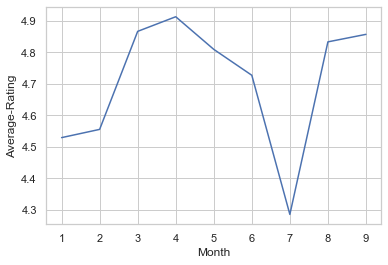

In [396]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.lineplot(data=df_final, x='Month',y='Average-Rating')

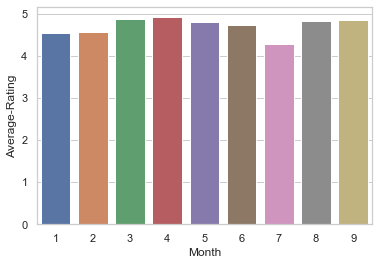

In [397]:
sns.barplot(data=df_final, x='Month',y='Average-Rating')